In [1]:
import numpy as np
from implementations import *
from helpers import *
import seaborn as sns

## Load Data

In [25]:
y, x, id = load_csv_data("data/train.csv")
x = standardize(x)[0]
y[y==-1]=0 # LR works properly with replacement

In [26]:
x_train, x_test, y_train, y_test = split_data(x, y, 0.70)

In [27]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([49229, 25771], dtype=int64))

In [28]:
w, loss = least_squares(y_train, x_train)
print(loss)
print(compute_loss(y_test, x_test, w))

0.14354705757605168
0.14365041202765783


In [29]:
lambdas = np.arange(0, 2, 0.01)
losses = []
for i in lambdas:
    w, loss = ridge_regression(y_train, x_train, 2)
    losses.append(compute_loss(y_test, x_test, w))
print(np.min(losses))

0.1593719275163605


In [30]:
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        loss: scalar number
    """
    w = initial_w
    loss = calculate_loss_logistic(y, tx, w)
    for n_iter in range(max_iters):
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    loss = calculate_loss_logistic(y, tx, w)
    return w, loss

In [36]:
lambdas = np.arange(0, 1, 0.05)
losses = []
max_iters = np.arange(35, 150, 10)
w = []
lambda1 = []
max_iter1 = []
for i in lambdas:
    for j in max_iters:
        w, loss = logistic_regression(y_train, x_train, np.zeros(30), j, i)
        losses.append(calculate_loss_logistic(y_test, x_test, w))
        lambda1.append(i)
        max_iter1.append(j)
print()
# losses = np.nan_to_num(losses, nan = 1)
index = np.where(losses == np.min(losses))
print(index)

d:\VSC_projects\ML_Higgs\implementations.py:29: RuntimeWarning: divide by zero encountered in log
  return np.sum(-(1 / y.shape[0]) * (y.T.dot(np.log(sigmoid(tx.dot(w))))+ (1 - y).T.dot(np.log(1 - sigmoid(tx.dot(w))))))



(array([227], dtype=int64),)


In [37]:
print("Test loss: ", losses[index])
print("Lambda: ", lambda1[int(index[0])])
print("Itersations: ", max_iter1[int(index[0])])


Test loss:  [0.56302726]
Lambda:  0.9
Itersations:  145


In [33]:
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """return the loss and gradient.
    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        lambda_: scalar
    """
    w = initial_w
    loss = calculate_loss_logistic(y, tx, w)
    for iter in range(max_iters):
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
    loss = calculate_loss_logistic(y, tx, w)   + lambda_ * np.sum(np.square(w))
    return w, loss

In [34]:
lambdas = np.arange(0, 1, 0.05)
max_iters = np.arange(5, 40, 5)
losses = []
lambda1 = []
max_iter1 = []
gamma = []
for i in lambdas:
    for j in lambdas:
        for k in max_iters:
            w, loss = reg_logistic_regression(y_train, x_train, i, np.zeros(30), k, j)
            losses.append(calculate_loss_logistic(y_test, x_test, w))
            lambda1.append(i)
            max_iter1.append(k)
            gamma.append(j)


print()
# losses = np.nan_to_num(losses, nan = 1)
index = np.where(losses == np.min(losses))
print(index)

KeyboardInterrupt: 

In [ ]:
print("Test loss: ", losses[index])
print("Lambda: ", lambda1[int(index[0])])
print("Gamma: ", gamma[int(index[0])])
print("Itersations: ", max_iter1[int(index[0])])

In [69]:
corr = np.zeros((x_train.shape[1], x_train.shape[1]))

In [70]:
for i in range(x_train.shape[1]):
   for j in range(x_train.shape[1]):
       corr[i][j] = np.corrcoef(x = x_train[:1000, i], y= x_train[:1000, j])[0, 1]

<AxesSubplot:>

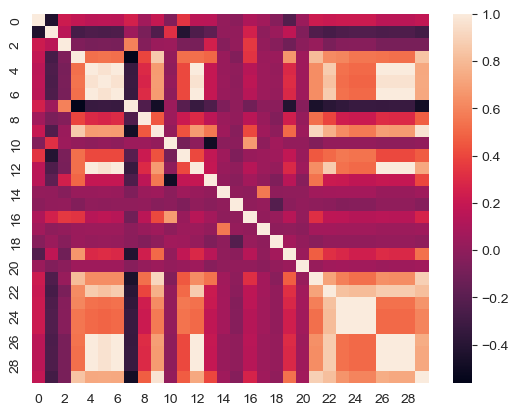

In [71]:
sns.heatmap(corr)
